# Homework 8 - Deep Learning
- Student: Aleksandra Kocot
 - [Git Hub page with the Homework Week8 questions](https://github.com/DataTalksClub/machine-learning-zoomcamp/blob/master/cohorts/2023/08-deep-learning/homework.md)

## Model
For this homework we will use Convolutional Neural Network (CNN). Like in the lectures, we'll use Keras.

You need to develop the model with following structure:

- The shape for input should be (150, 150, 3)
- Next, create a convolutional layer (Conv2D):
    - Use 32 filters
    - Kernel size should be (3, 3) (that's the size of the filter)
    - Use 'relu' as activation
- Reduce the size of the feature map with max pooling (MaxPooling2D)
    - Set the pooling size to (2, 2)
- Turn the multi-dimensional result into vectors using a Flatten layer
- Next, add a Dense layer with 64 neurons and 'relu' activation
- Finally, create the Dense layer with 1 neuron - this will be the output
- The output layer should have an activation - use the appropriate activation for the binary classification case
- As optimizer use SGD with the following parameters:
    - SGD(lr=0.002, momentum=0.8)

In [45]:
import os
import numpy as np
import matplotlib.pyplot as plt

import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img, img_to_array, array_to_img

In [5]:
# Functional style of defining NN 
inputs = keras.Input(shape=(150, 150, 3))
vectors = keras.layers.GlobalMaxPooling2D()(inputs)
outputs = keras.layers.Dense(64)(vectors)
model = keras.Model(inputs, outputs)

In [6]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 global_max_pooling2d_1 (Gl  (None, 3)                 0         
 obalMaxPooling2D)                                               
                                                                 
 dense_1 (Dense)             (None, 64)                256       
                                                                 
Total params: 256 (1.00 KB)
Trainable params: 256 (1.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [7]:
# Sequential style of defining NN 
input_shape=(150, 150, 3)
model_s = Sequential()
model_s.add(Conv2D(32, 3,
                 activation='relu',
                 input_shape=input_shape))
model_s.add(MaxPooling2D(pool_size=(2, 2)))
model_s.add(Flatten())
model_s.add(Dense(64, activation='relu'))
model_s.add(Dense(1, activation='sigmoid'))

In [8]:
model_s.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 175232)            0         
                                                                 
 dense_2 (Dense)             (None, 64)                11214912  
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 11215873 (42.79 MB)
Trainable params: 11215873 (42.79 MB)
Non-trainable params: 0 (0.00 Byte)
______________

In [9]:
model_s.compile(loss='binary_crossentropy',\
             optimizer=keras.optimizers.SGD(learning_rate=0.002, momentum=0.8),\
             metrics=['acc'])

### Question 1
Since we have a binary classification problem, what is the best <b>loss function</b> for us?

- mean squared error
- <b>binary crossentropy</b>
- categorical crossentropy
- cosine similarity

Note: since we specify an activation for the output layer, we don't need to set from_logits=True

### Question 2
What's the number of parameters in the convolutional layer of our model? You can use the summary method for that.
- 1
- 65
- <b>896</b>
- 11214912

##### Generators and Training
For the next two questions, use the following data generator for both train and test sets:

```ImageDataGenerator(rescale=1./255)```
- We don't need to do any additional pre-processing for the images.
- When reading the data from train/test directories, check the class_mode parameter. Which value should it be for a binary classification problem?
- Use batch_size=20
- Use shuffle=True for both training and test sets.
- For training use .fit() with the following params:

```
model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)
```

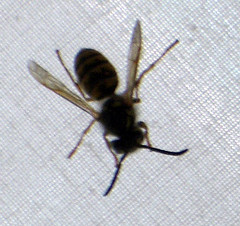

In [10]:
path = './data/train/wasp'
name = '278591_13f688b836_m.jpg'
fullname = f'{path}/{name}'
img = load_img(fullname)
img

In [11]:
x = np.array(img)
x.shape

(226, 240, 3)

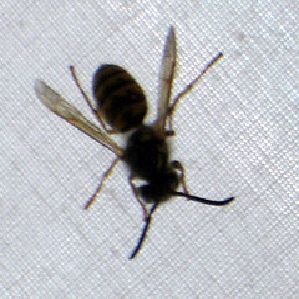

In [12]:
img = load_img(fullname, target_size=(299, 299))
img

In [13]:
x = np.array(img)
x.shape

(299, 299, 3)

In [29]:
train_dir = './data/train'
test_dir = './data/test'

In [30]:
input_size = 150

train_gen = ImageDataGenerator(rescale=1./255)
test_gen = ImageDataGenerator(rescale=1./255)

train_generator = train_gen.flow_from_directory(
    train_dir,
    target_size=(input_size, input_size),
    batch_size=20,
    shuffle=True,
    class_mode="binary"
)

test_generator = test_gen.flow_from_directory(
    test_dir,
    target_size=(input_size, input_size),
    batch_size=20,
    shuffle=True,
    class_mode="binary"
)

Found 3677 images belonging to 2 classes.
Found 918 images belonging to 2 classes.


In [31]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break
     

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [32]:
train_generator.class_indices

{'bee': 0, 'wasp': 1}

In [33]:
X, y = next(train_generator)
y[:5]

array([1., 0., 1., 0., 0.], dtype=float32)

In [34]:
history = model_s.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)

Epoch 1/10
184/184 [==============================] - 44s 239ms/step - loss: 0.6799 - acc: 0.5521 - val_loss: 0.6545 - val_acc: 0.6155
Epoch 2/10
184/184 [==============================] - 44s 239ms/step - loss: 0.6544 - acc: 0.5975 - val_loss: 0.6127 - val_acc: 0.6514
Epoch 3/10
184/184 [==============================] - 55s 299ms/step - loss: 0.6299 - acc: 0.6377 - val_loss: 0.5852 - val_acc: 0.6874
Epoch 4/10
184/184 [==============================] - 44s 240ms/step - loss: 0.5791 - acc: 0.7022 - val_loss: 0.6116 - val_acc: 0.6198
Epoch 5/10
184/184 [==============================] - 42s 229ms/step - loss: 0.5465 - acc: 0.7267 - val_loss: 0.5496 - val_acc: 0.7244
Epoch 6/10
184/184 [==============================] - 41s 223ms/step - loss: 0.5207 - acc: 0.7479 - val_loss: 0.5162 - val_acc: 0.7484
Epoch 7/10
184/184 [==============================] - 40s 218ms/step - loss: 0.4972 - acc: 0.7775 - val_loss: 0.5096 - val_acc: 0.7636
Epoch 8/10
184/184 [==============================] - 4

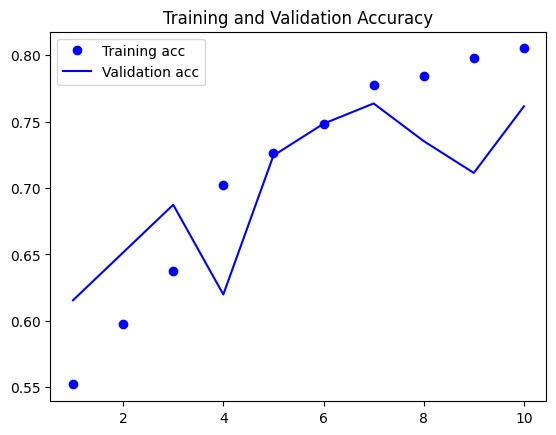

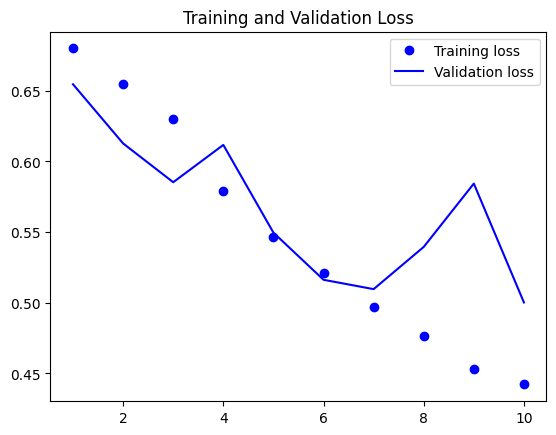

In [35]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

In [36]:
# acc = history.history['acc']
acc_median = np.median(acc)
acc_median

0.737285852432251

In [37]:
loss_std = np.std(loss)
loss_std

0.08068500657432329

## Question 3
What is the median of training accuracy for all the epochs for this model?
- 0.20
- 0.40
- 0.60
- <b>0.80</b>


### Question 4
What is the standard deviation of training loss for all the epochs for this model?
- 0.031
- 0.061
- <b>0.091</b>
- 0.131

##### Data Augmentation
For the next two questions, we'll generate more data using data augmentations.

Add the following augmentations to your training data generator:

- rotation_range=50,
- width_shift_range=0.1,
- height_shift_range=0.1,
- zoom_range=0.1,
- horizontal_flip=True,
- fill_mode='nearest'


In [16]:
datagen = ImageDataGenerator(
    rotation_range=50,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

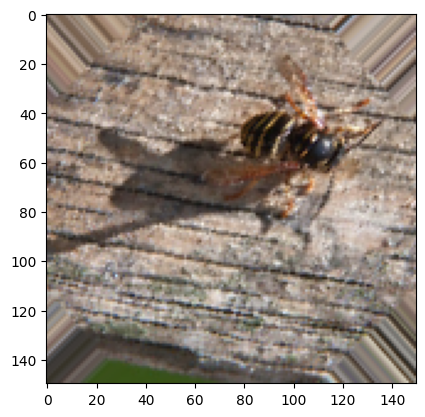

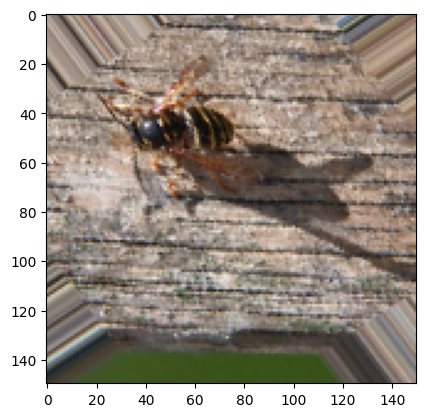

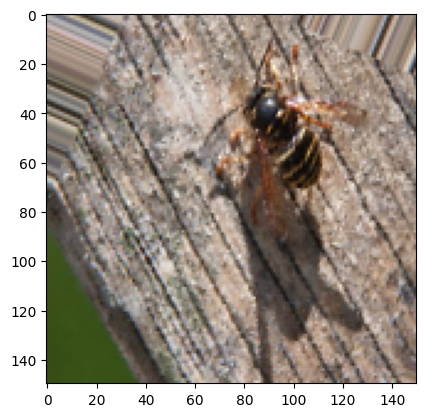

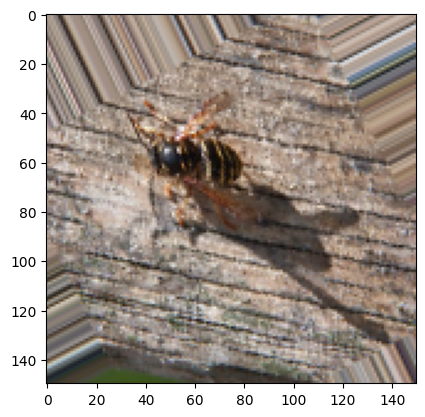

In [46]:
fnames = [os.path.join(train_dir+"/wasp", fname) for
    fname in os.listdir(train_dir+"/wasp")]

img_path = fnames[0]

img = load_img(img_path, target_size=(150, 150))

x = img_to_array(img)

x = x.reshape((1,) + x.shape)

i=0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

In [47]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [48]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=50,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [49]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150), 
                                                    batch_size=32, 
                                                    class_mode='binary')

Found 3677 images belonging to 2 classes.


In [50]:
validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')
     

Found 918 images belonging to 2 classes.


In [51]:
history = model_s.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator)

Epoch 1/10
115/115 [==============================] - 38s 332ms/step - loss: 0.4966 - acc: 0.7686 - val_loss: 0.5051 - val_acc: 0.7549
Epoch 2/10
115/115 [==============================] - 42s 367ms/step - loss: 0.4872 - acc: 0.7735 - val_loss: 0.4880 - val_acc: 0.7603
Epoch 3/10
115/115 [==============================] - 41s 352ms/step - loss: 0.4805 - acc: 0.7740 - val_loss: 0.5030 - val_acc: 0.7473
Epoch 4/10
115/115 [==============================] - 43s 371ms/step - loss: 0.4798 - acc: 0.7775 - val_loss: 0.5333 - val_acc: 0.7451
Epoch 5/10
115/115 [==============================] - 42s 364ms/step - loss: 0.4793 - acc: 0.7716 - val_loss: 0.4721 - val_acc: 0.7734
Epoch 6/10
115/115 [==============================] - 42s 363ms/step - loss: 0.4822 - acc: 0.7729 - val_loss: 0.5310 - val_acc: 0.7331
Epoch 7/10
115/115 [==============================] - 41s 357ms/step - loss: 0.4779 - acc: 0.7794 - val_loss: 0.4634 - val_acc: 0.7876
Epoch 8/10
115/115 [==============================] - 4

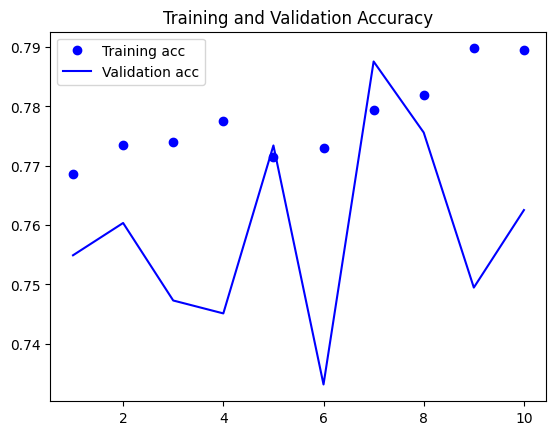

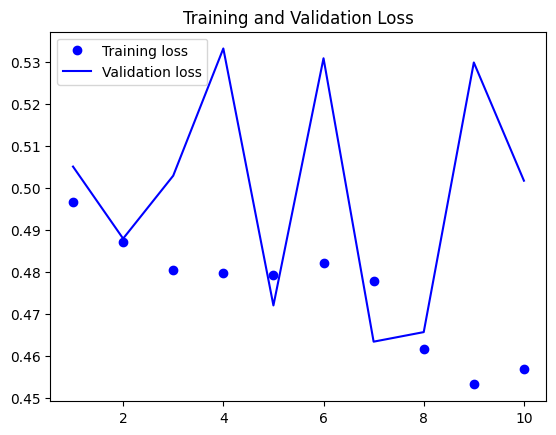

In [52]:
acc_aug = history.history['acc']
val_acc_aug = history.history['val_acc']
loss_aug = history.history['loss']
val_loss_aug = history.history['val_loss']

epochs_aug = range(1, len(acc) + 1)

plt.plot(epochs_aug, acc_aug, 'bo', label='Training acc')
plt.plot(epochs_aug, val_acc_aug, 'b', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs_aug, loss_aug, 'bo', label='Training loss')
plt.plot(epochs_aug, val_loss_aug, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

In [53]:
loss_mean_aug = np.mean(val_loss_aug)
loss_mean_aug

0.4993286579847336

In [54]:
val_acc_aug[5:10]

[0.7331154942512512,
 0.7875816822052002,
 0.7755991220474243,
 0.7494553327560425,
 0.7625272274017334]

In [55]:
acc_mean_aug = np.mean(val_acc_aug[5:10])
acc_mean_aug

0.7616557717323303

## Question 5
Let's train our model for 10 more epochs using the same code as previously.

Note: make sure you don't re-create the model - we want to continue training the model we already started training.

What is the mean of test loss for all the epochs for the model trained with augmentations?
- 0.18
- <b>0.48</b>
- 0.78
- 0.108

## Question 6
What's the average of test accuracy for the last 5 epochs (from 6 to 10) for the model trained with augmentations?
- 0.38
- 0.58
- <b>0.78</b>
- 0.98